# Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


read the csv dataset

In [4]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
print("minimun date :",df["policy_bind_date"].min())
print("max date :",df["policy_bind_date"].max())

minimun date : 01-01-2006
max date : 31-12-2012


In [9]:
print("minimun date :",df["incident_date"].min())
print("max date :",df["incident_date"].max())

minimun date : 01-01-2015
max date : 31-01-2015


In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop('_c39',inplace=True,axis=1)

In [13]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [14]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

<Axes: >

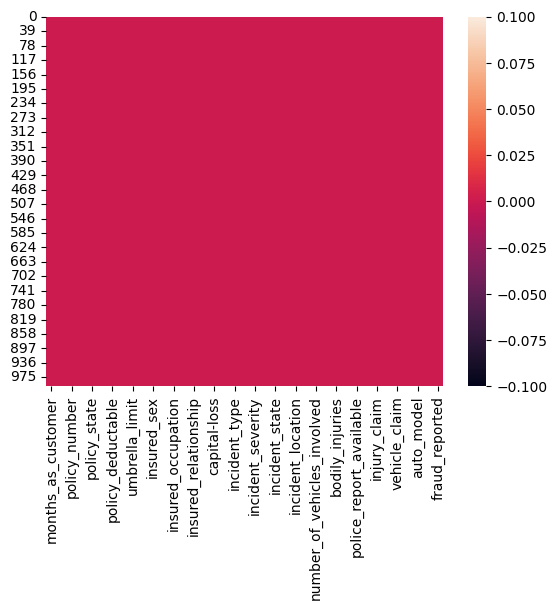

In [15]:
sns.heatmap(df.isnull())

In [16]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)



Categorical columns are: Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


Numerical columns are: Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')


In [17]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [18]:
for i in ccol:
    unique_objects_count = df[i].value_counts()
    print(f"Number of unique values in {i}: {len(df[i].unique())}")
    print(unique_objects_count)
    print()

Number of unique values in policy_bind_date: 951
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, Length: 951, dtype: int64

Number of unique values in policy_state: 3
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

Number of unique values in policy_csl: 3
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64

Number of unique values in insured_sex: 2
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

Number of unique values in insured_education_level: 7
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64

Number of unique values in insured_occupation: 14
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support  

In [19]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Uni-varient analysis

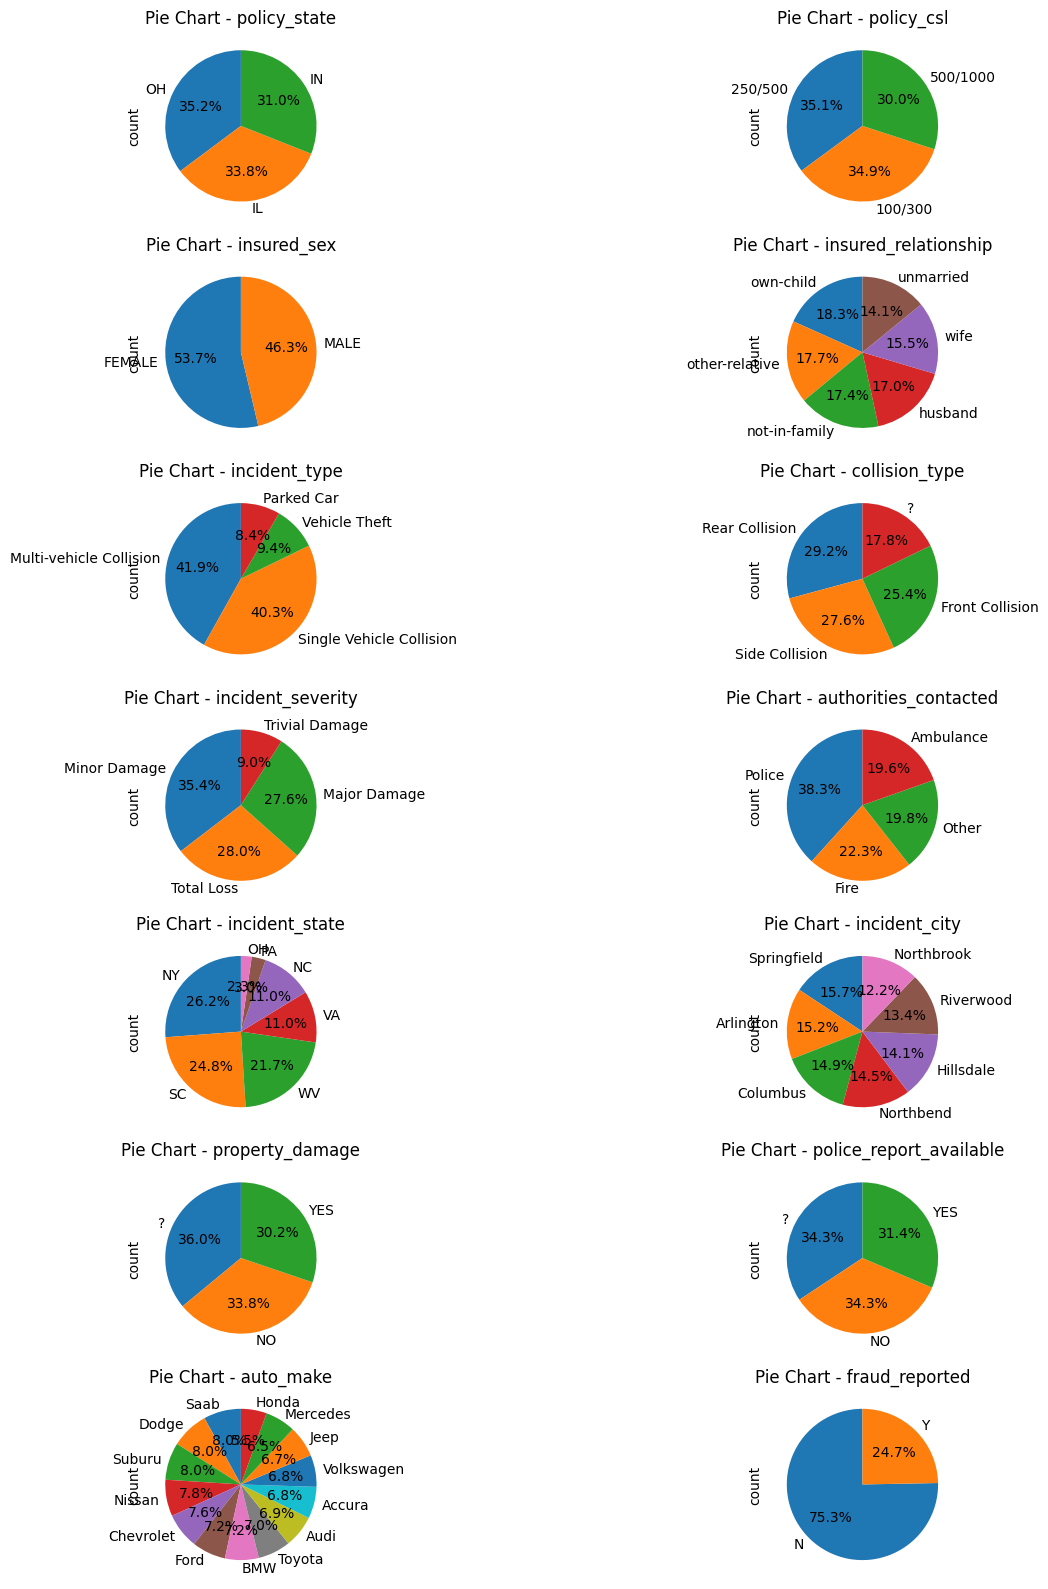

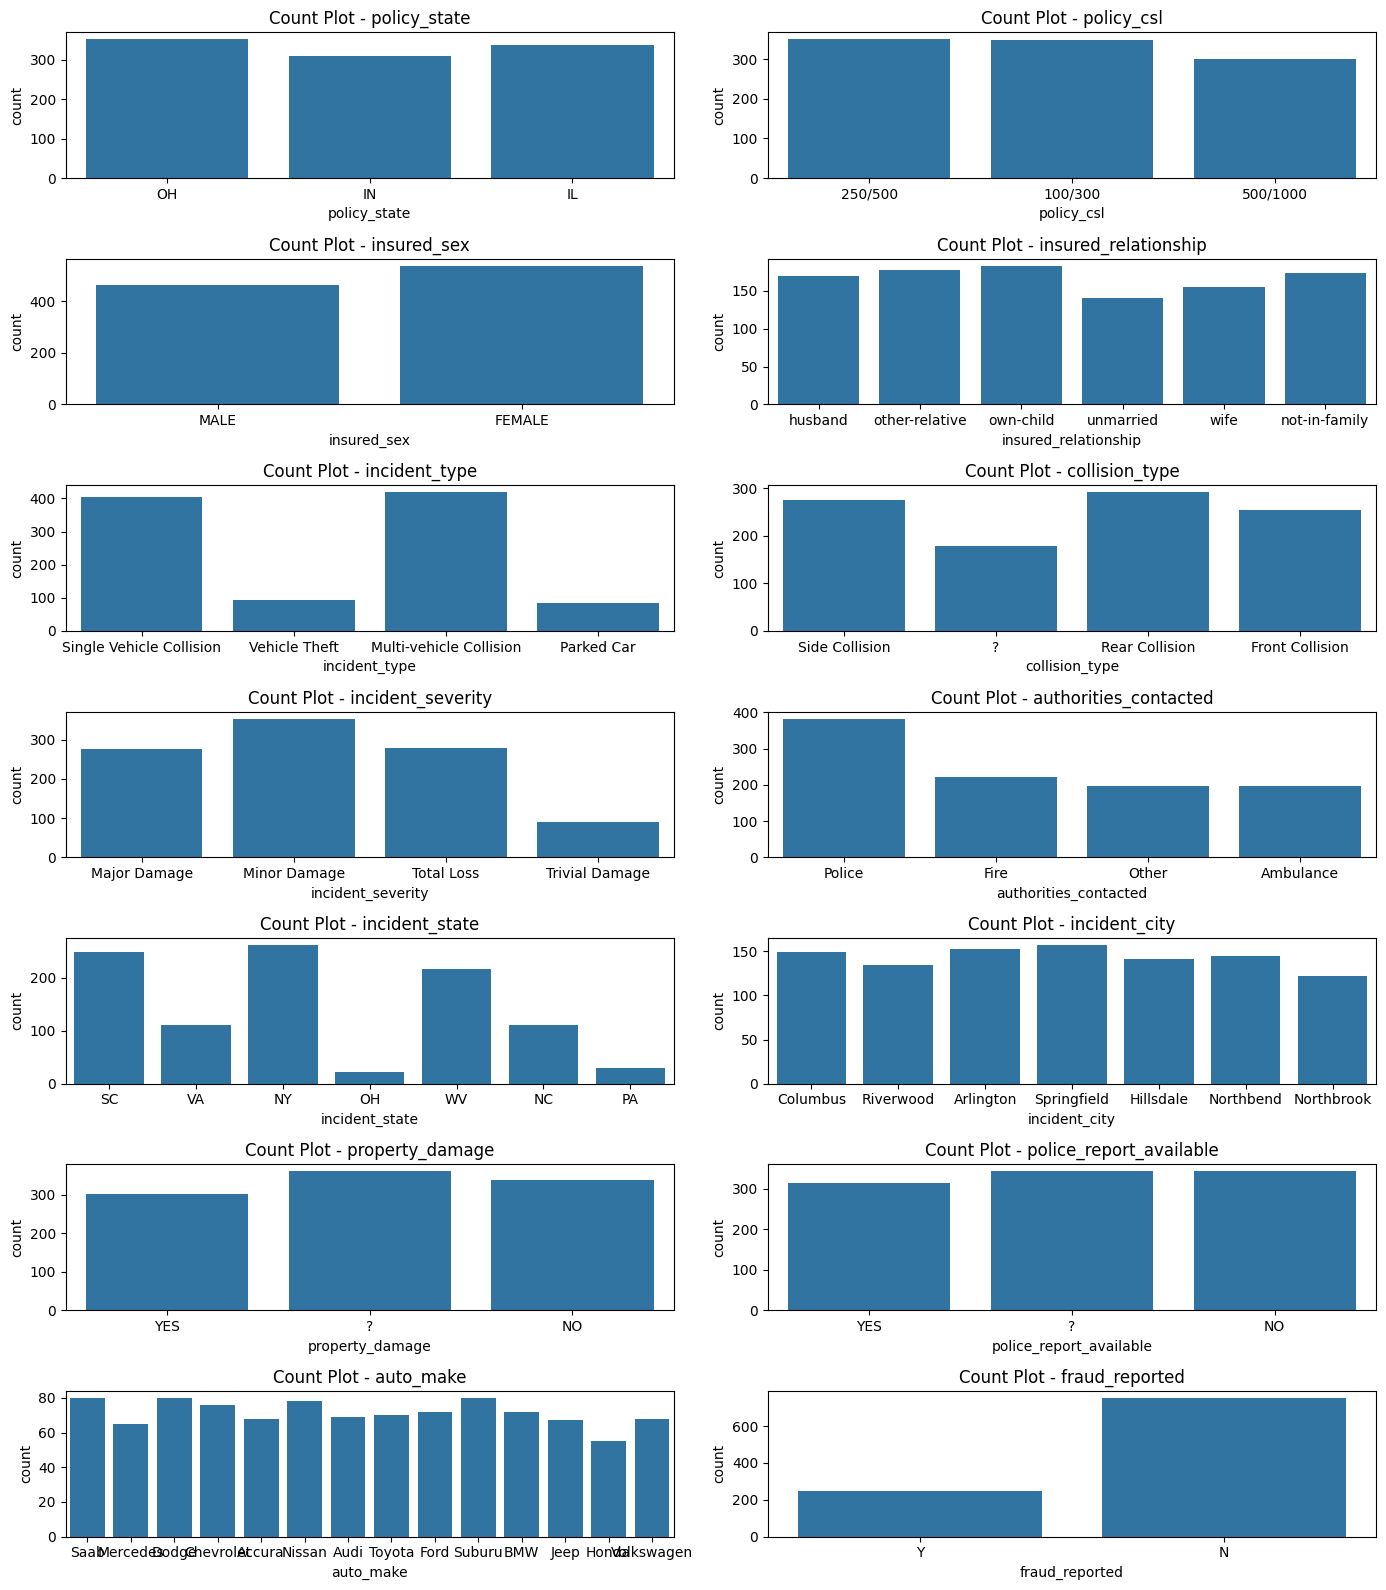

In [20]:

cat= ['policy_state', 'policy_csl', 'insured_sex', 'insured_relationship',
                        'incident_type', 'collision_type', 'incident_severity',
                        'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available',
                        'auto_make', 'fraud_reported']

fig, axes = plt.subplots(len(cat)//2, 2, figsize=(14, 16))
axes = axes.flatten()

# for pie
for i, column in enumerate(cat):
    df[column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=axes[i], startangle=90)
    axes[i].set_title(f'Pie Chart - {column}') 

plt.tight_layout()
plt.show()

# for count
fig, axes = plt.subplots(len(cat)//2, 2, figsize=(14, 16))
axes = axes.flatten()

for i, column in enumerate(cat):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot - {column}')

plt.tight_layout()
plt.show()


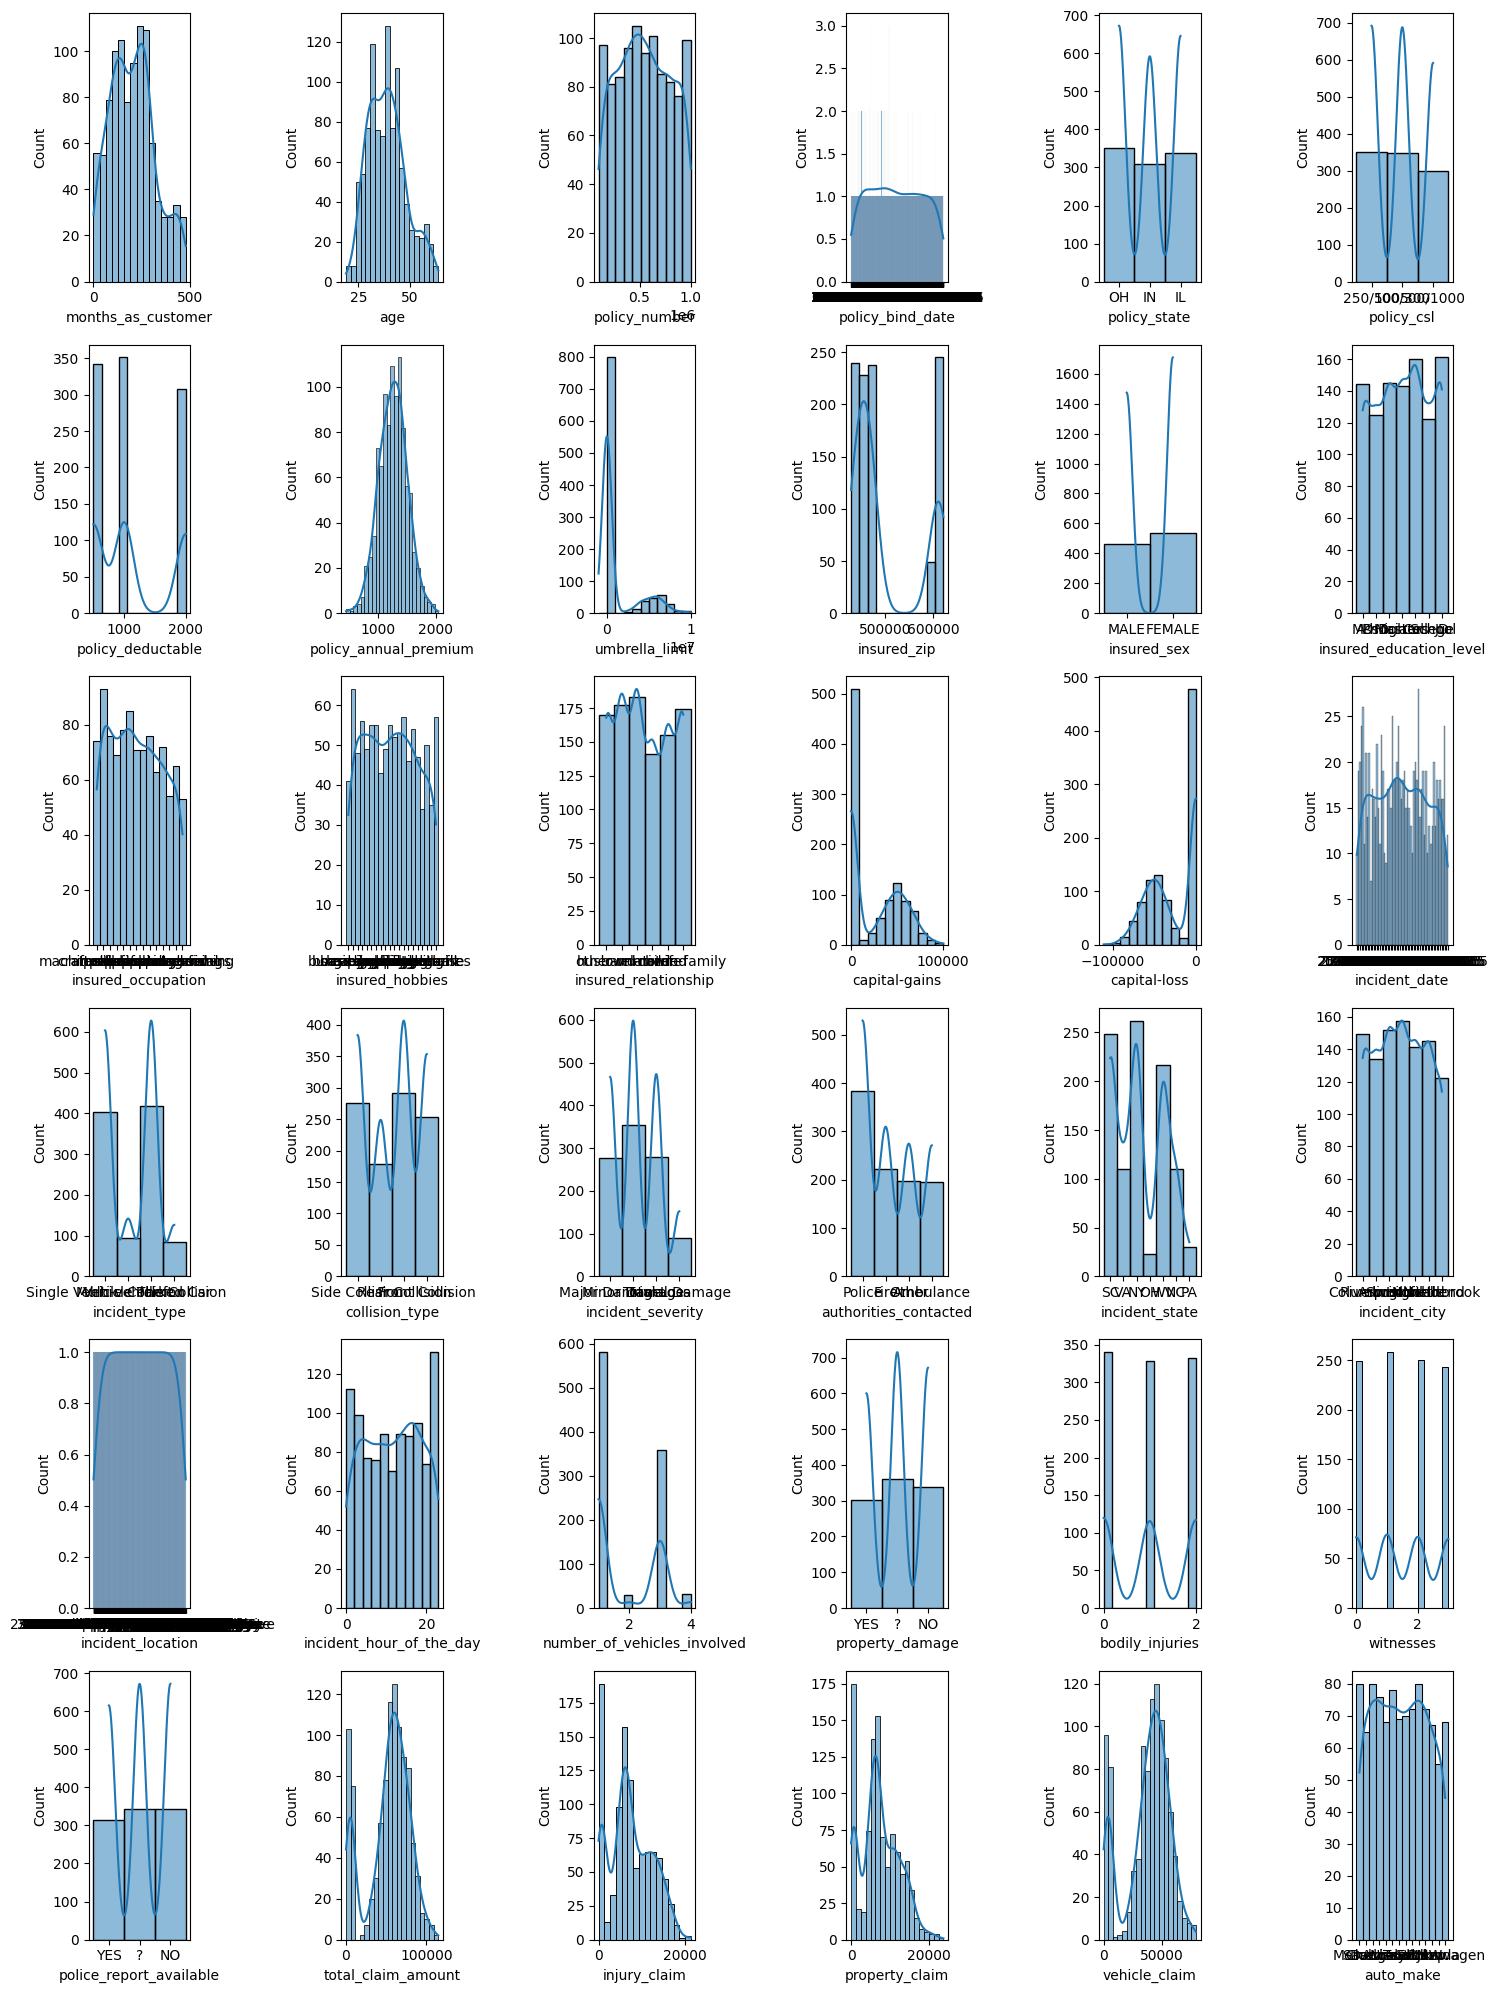

In [21]:
plt.figure(figsize=(15,20))
pltno = 1
for i in df.columns:
    if pltno <= 36:
        ax = plt.subplot(6,6, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show()

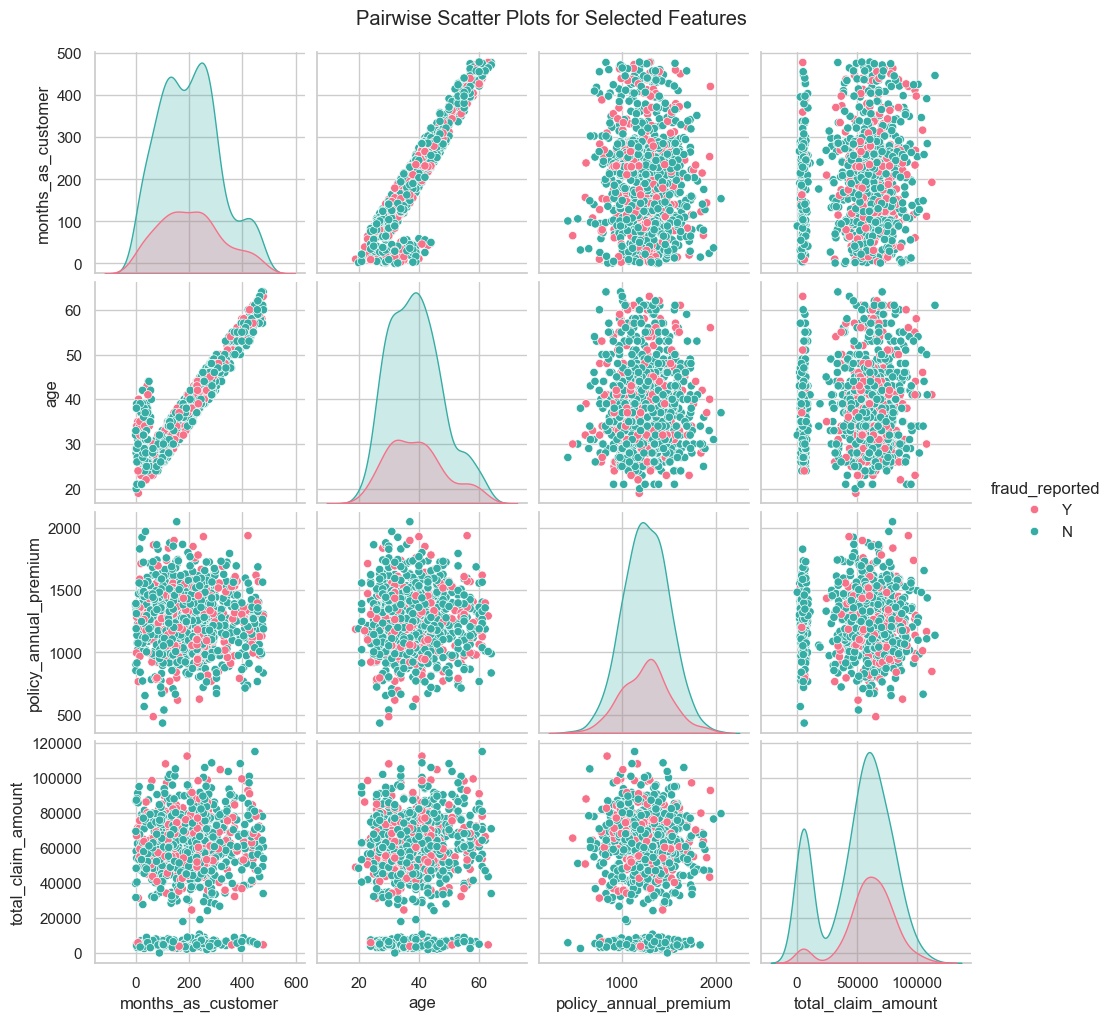

In [22]:
selected_features = ['months_as_customer', 'age', 'policy_annual_premium', 'insured_sex',
                      'insured_education_level', 'incident_severity', 'auto_make',
                      'total_claim_amount', 'fraud_reported']

sns.set(style="whitegrid")

# Pairwise scatter plots
sns.pairplot(df[selected_features], hue='fraud_reported', palette='husl')
plt.suptitle("Pairwise Scatter Plots for Selected Features", y=1.02)
plt.show()


LabelEncode for categorical data

In [23]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


In [24]:
# dropping unimportant columns

df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1


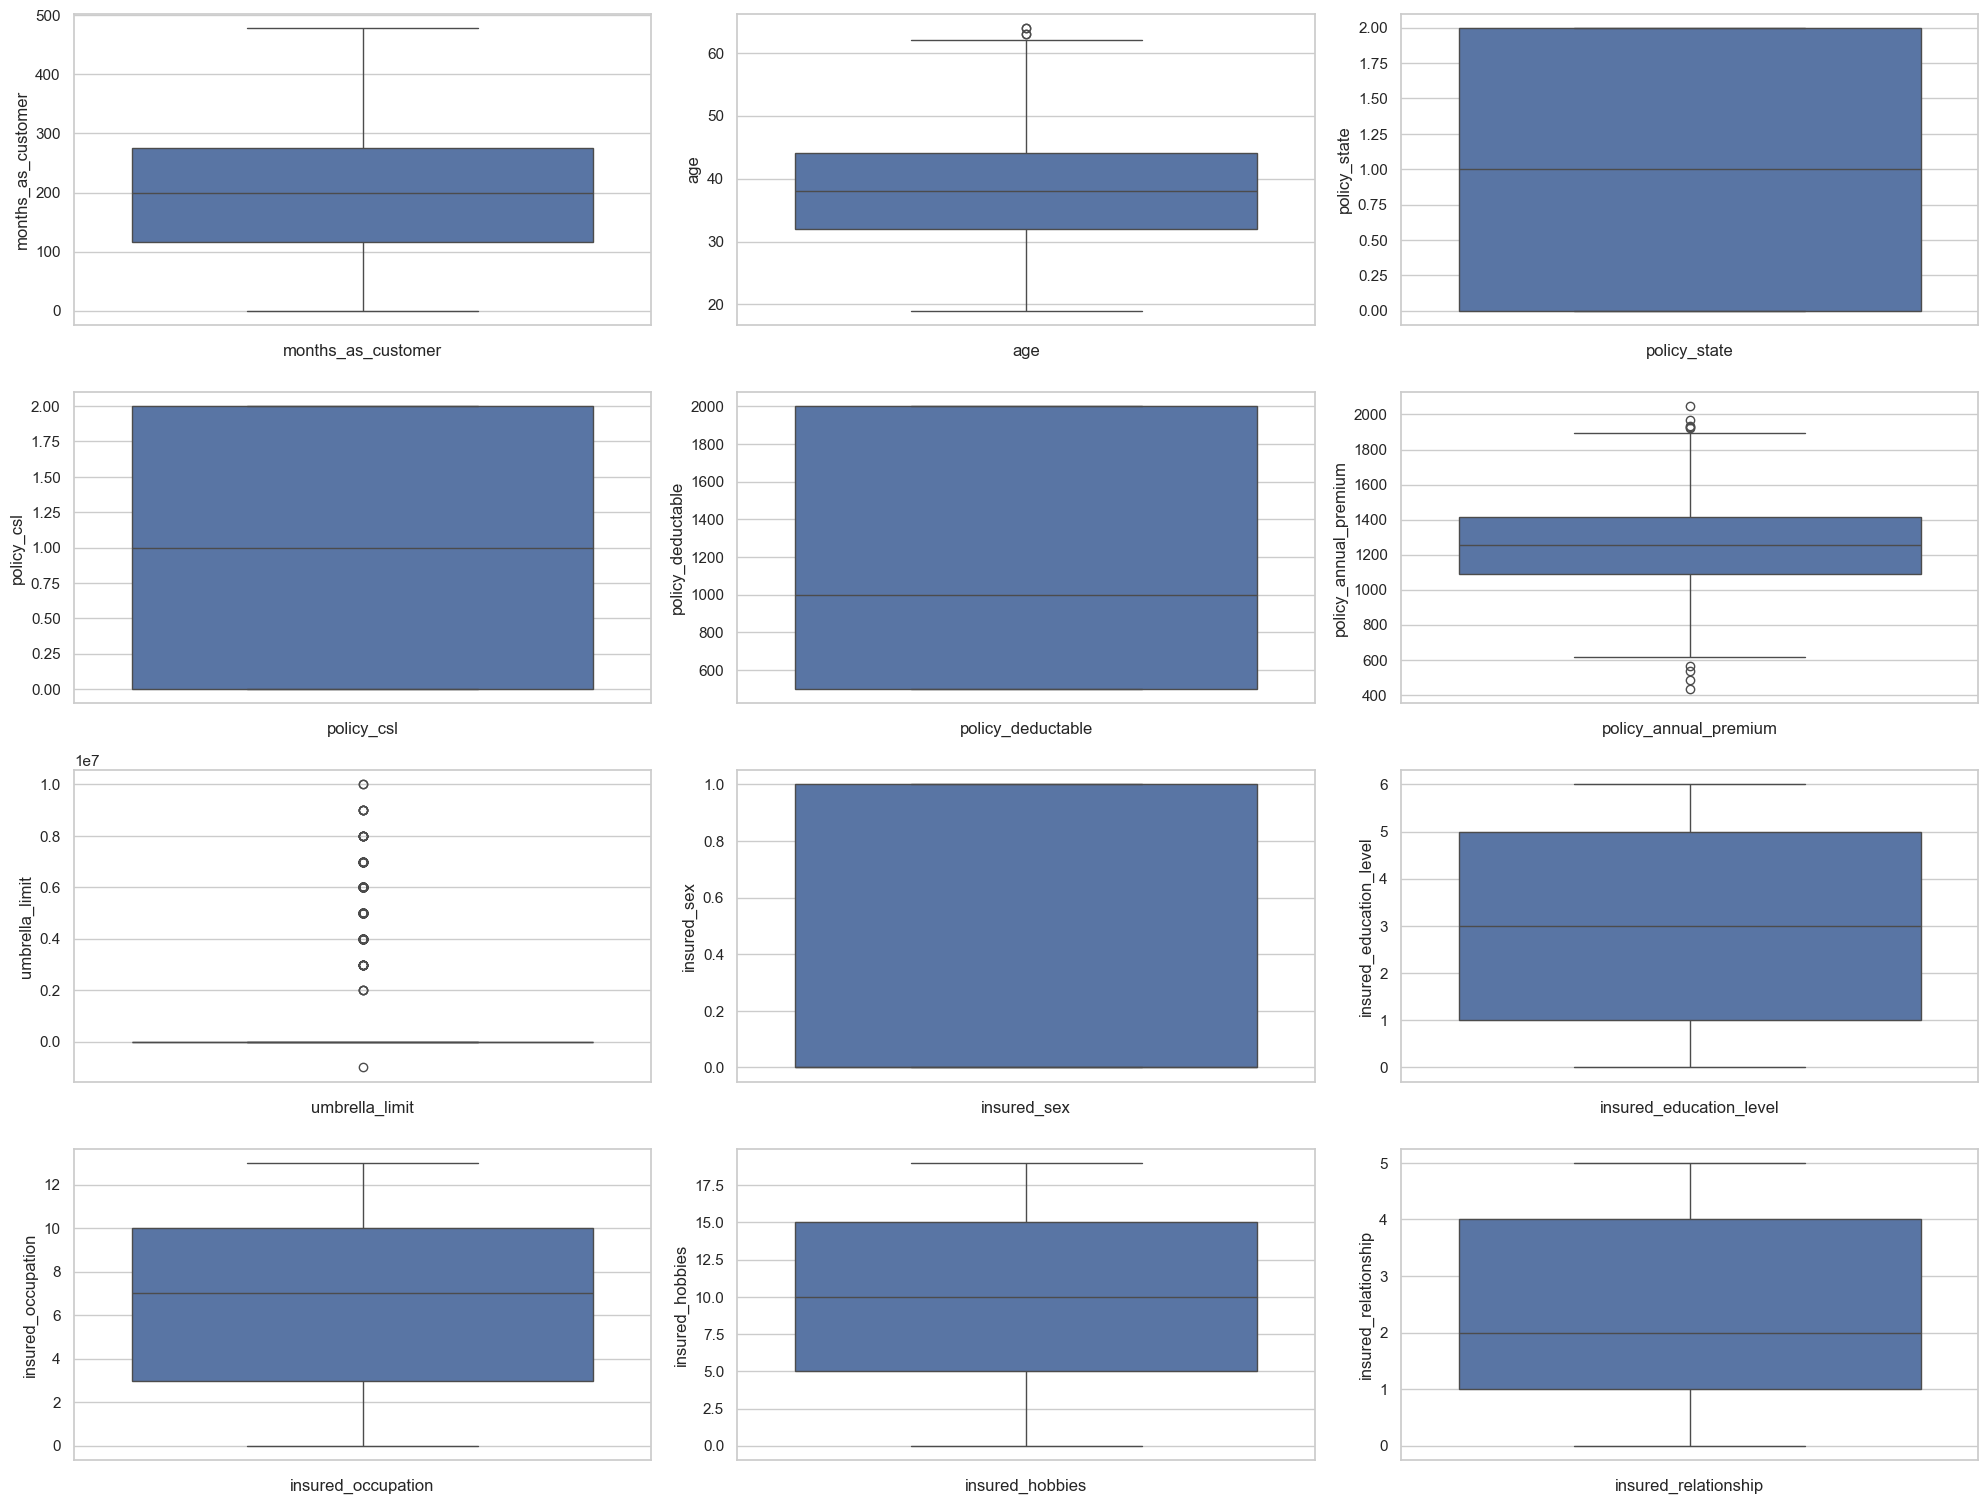

In [25]:
plt.figure(figsize=(20,30),facecolor="white")
pltno=1
for i in df:
    if pltno<=12:
        plt.subplot(8,3,pltno)
        sns.boxplot(df[i],color="b")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

In [26]:
df.shape

(1000, 32)

In [27]:
# METHOD 1
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [28]:
df1.shape

(980, 32)

In [29]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  2.0


In [30]:
df=df1

Heatmap for checking correlation

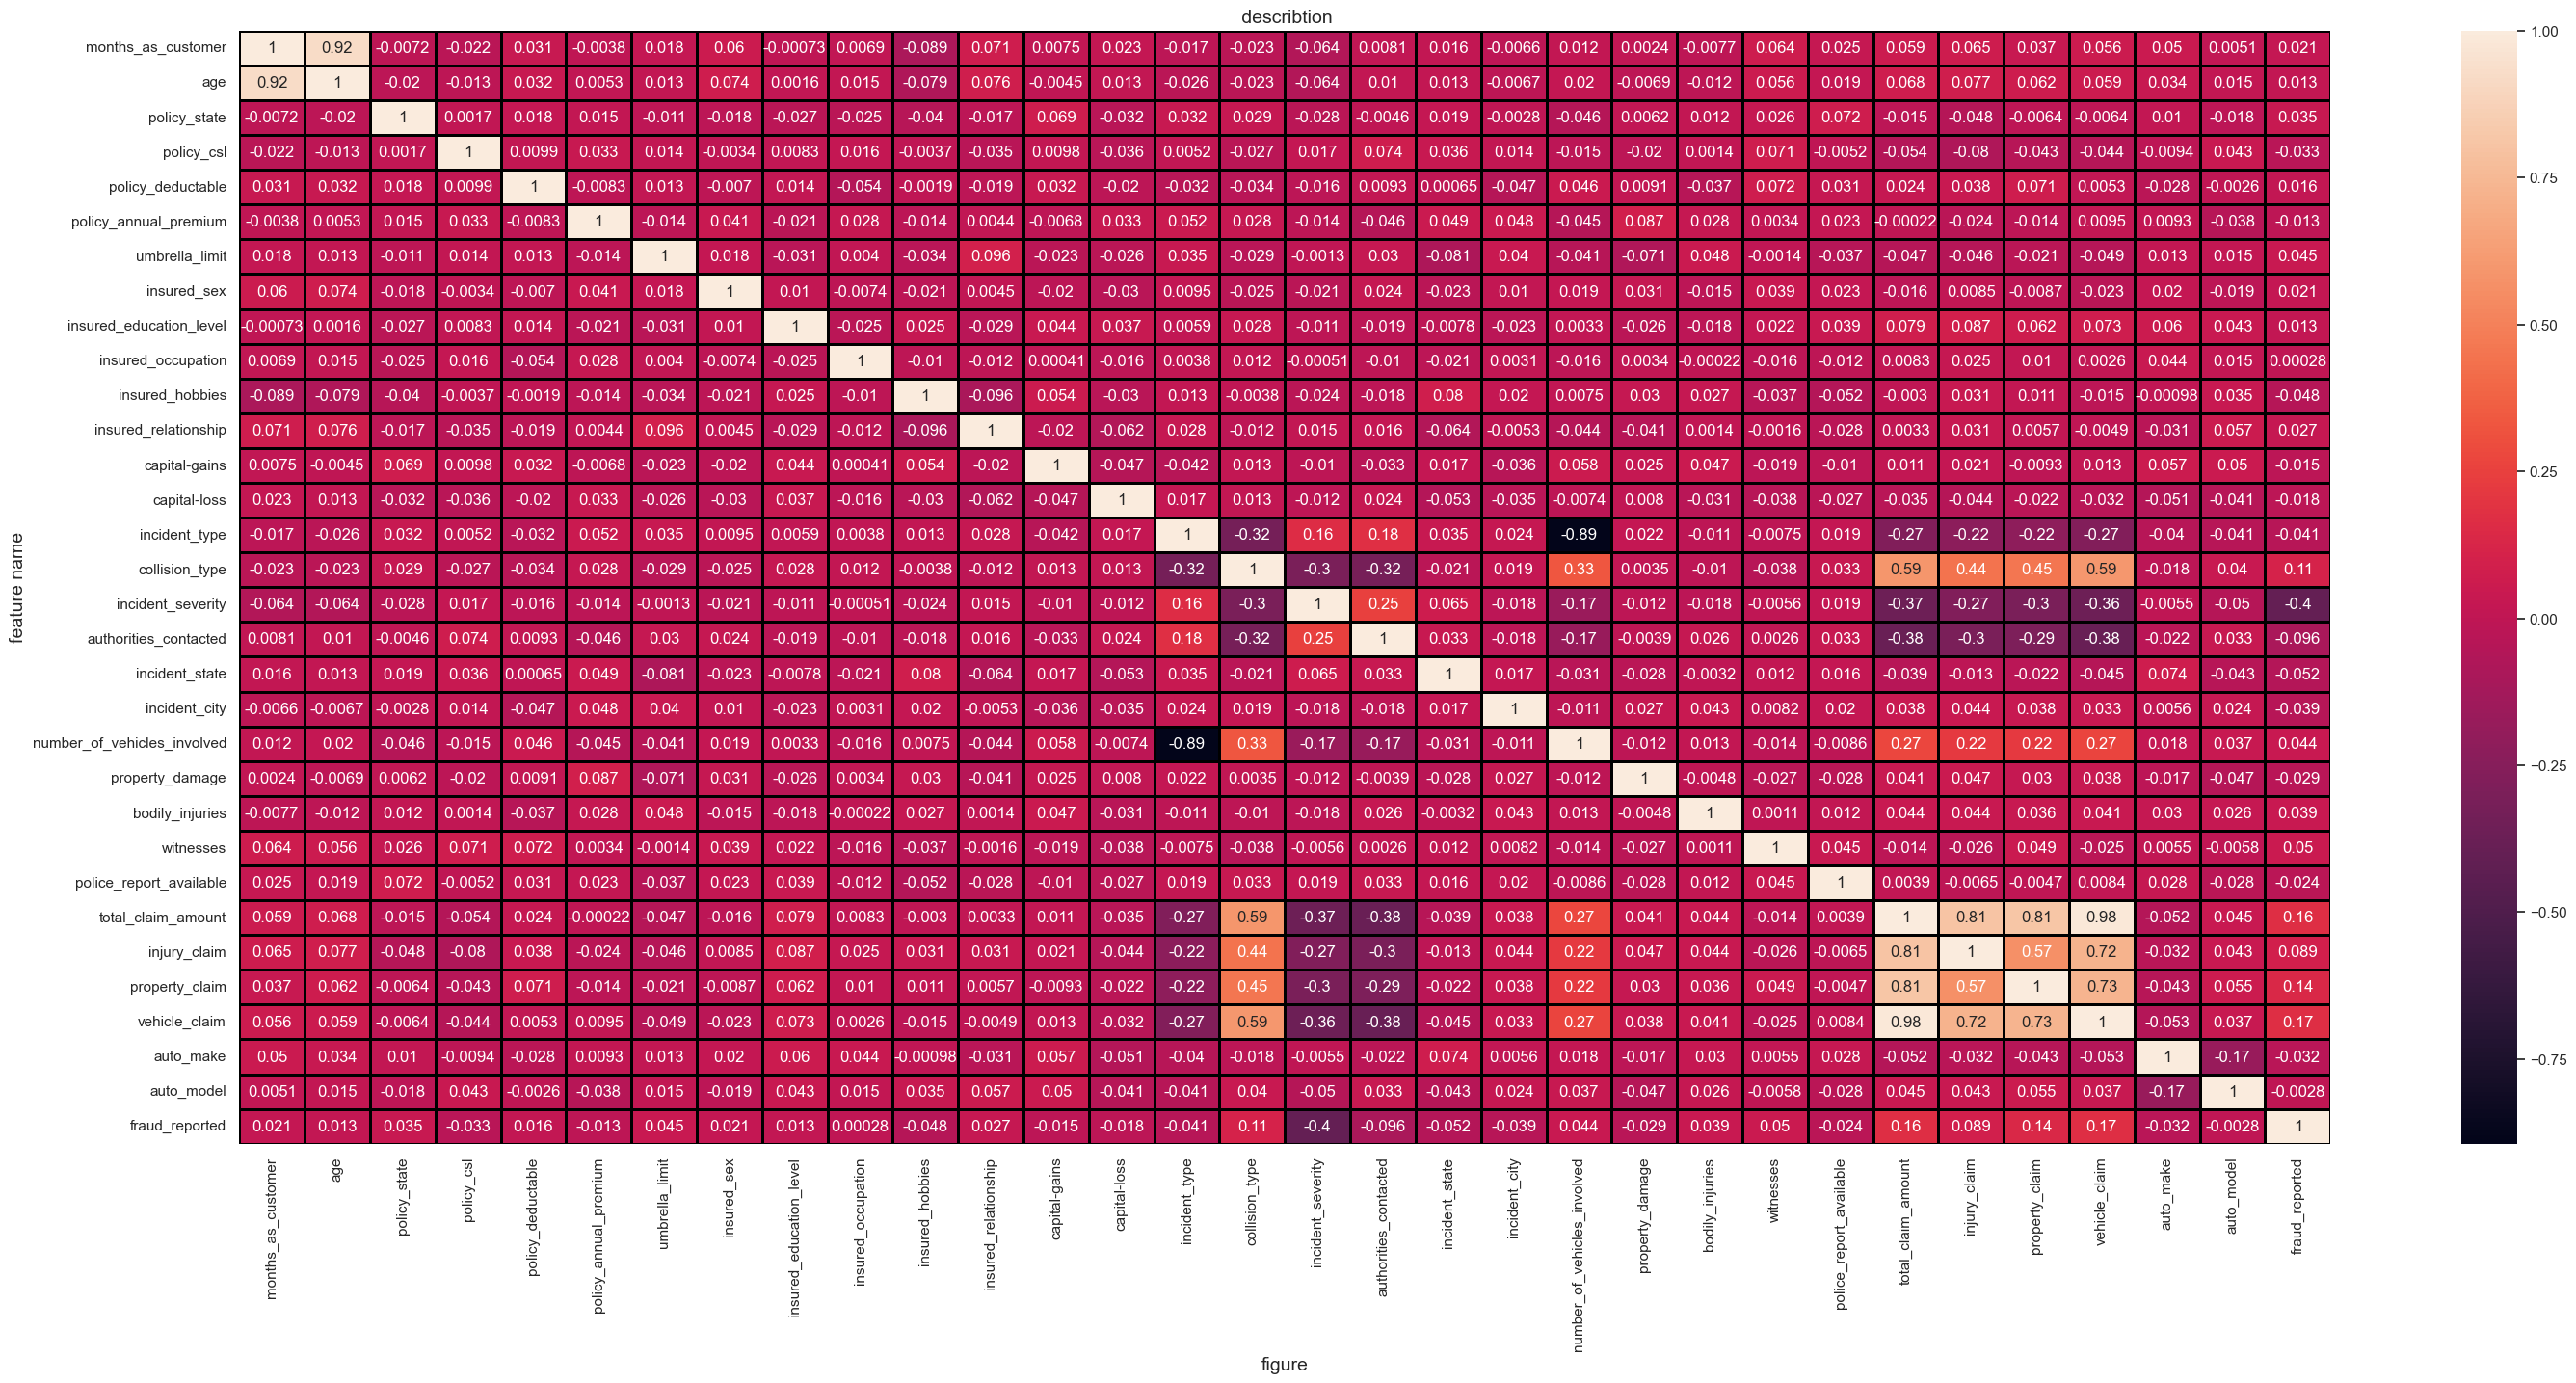

In [31]:
plt.figure(figsize = (35, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

In [32]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.296476
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.044659


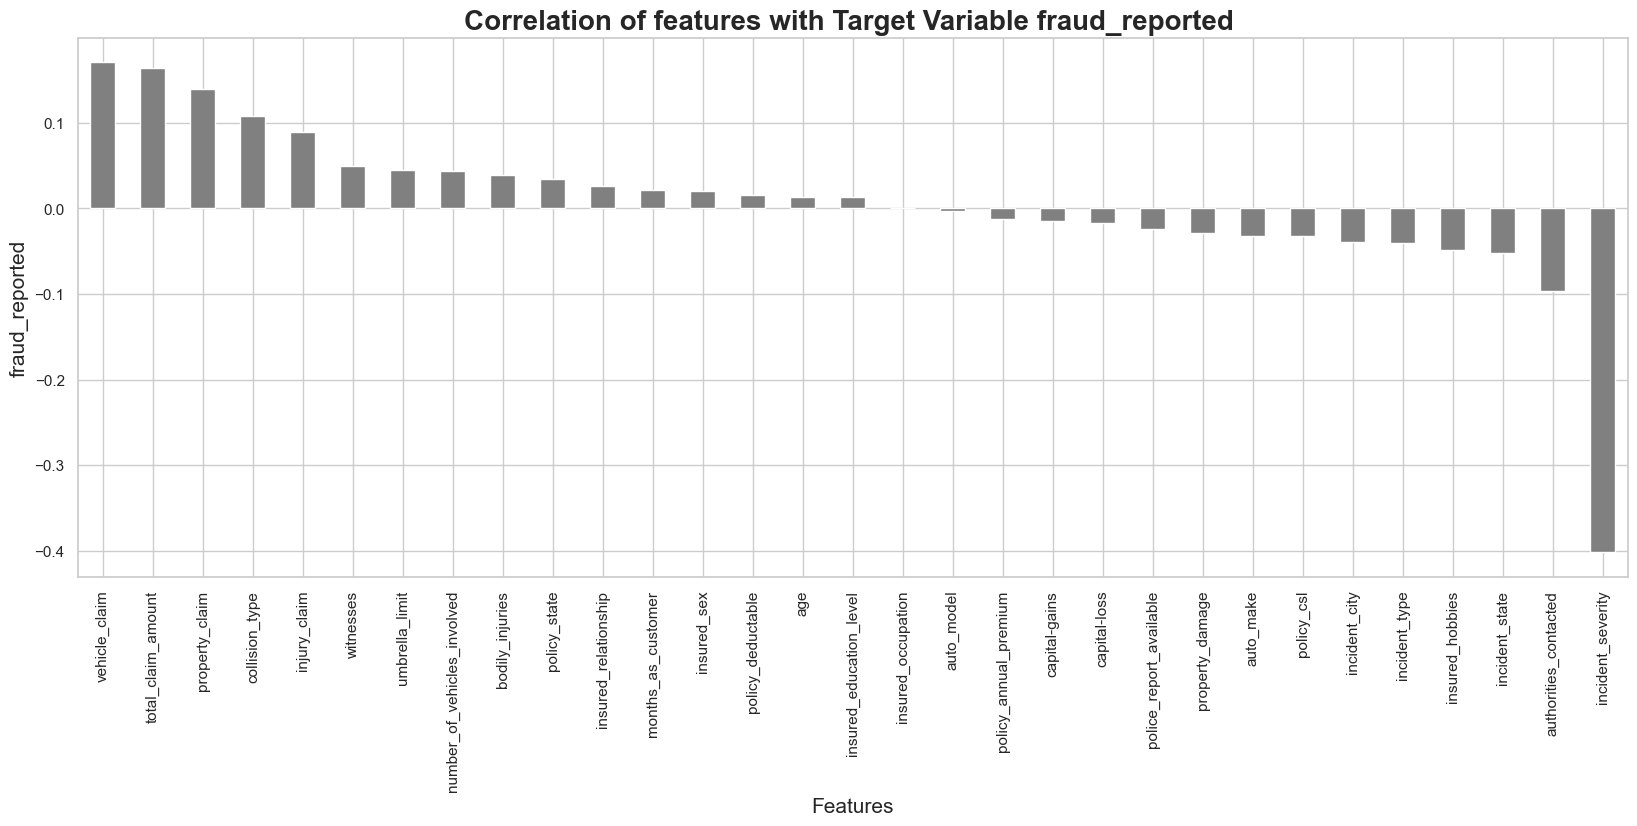

In [33]:
plt.figure(figsize = (20,7))
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('Correlation of features with Target Variable fraud_reported ',fontsize = 20,fontweight='bold')
plt.show()

In [34]:
def corr_columns(df, threshold):
    correlated_columns = set()
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[:i]):
            if abs(df[col1].corr(df[col2])) > threshold:
                correlated_columns.add(col1)
    
    return correlated_columns
features = corr_columns(df, 0.5)
len(set(features))

6

In [35]:
def top(df, threshold, top_n=10):
    col= set()
    
    for i, col1 in enumerate(df.columns):
        for col2 in df.columns[:i]:
            correlation = abs(df[col1].corr(df[col2]))
            if correlation > threshold:
                col.add(col1)
                col.add(col2)
                
                if len(col) >= 2 * top_n:
                    return col
    
    return col

features = top(df, threshold=0.5, top_n=10)
print("Features:", len(features))


Features: 9


In [36]:
features

{'age',
 'collision_type',
 'incident_type',
 'injury_claim',
 'months_as_customer',
 'number_of_vehicles_involved',
 'property_claim',
 'total_claim_amount',
 'vehicle_claim'}

In [37]:
df1= df[['total_claim_amount', 'age', 'property_claim', 'months_as_customer', 'number_of_vehicles_involved', 'collision_type', 'vehicle_claim', 'incident_type', 'injury_claim','fraud_reported']]


In [38]:
x = df1.drop(['fraud_reported'], axis=1)
y = df1['fraud_reported']

In [39]:
print(x.shape, y.shape)

(980, 9) (980,)


In [40]:
y.value_counts()

fraud_reported
0    740
1    240
Name: count, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [42]:
y1.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

Scaling the train features

In [43]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [45]:
print('Training set size - ' , x_train.shape)
print('Testing set size - ' , x_test.shape)

Training set size -  (686, 9)
Testing set size -  (294, 9)


Model buidling

In [46]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [47]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
value.score(x_train,y_train)

0.8717201166180758

In [49]:
value.score(x_test,y_test)

0.7108843537414966

In [50]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acc[key]=accuracy_score(y_test, value)
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
    'Accuracy':acc,
})

print("\n details for each model:")
print(details)

best_model =max(acc, key=acc.get) and  min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


 details for each model:
          MAE       MSE  R-squared      RMSE  Accuracy
dt   0.357143  0.357143  -0.832265  0.597614  0.642857
rf   0.278912  0.278912  -0.430912  0.528121  0.721088
lgR  0.265306  0.265306  -0.361111  0.515079  0.734694
nb   0.360544  0.360544  -0.849715  0.600453  0.639456
svm  0.265306  0.265306  -0.361111  0.515079  0.734694
knn  0.299320  0.299320  -0.535613  0.547101  0.700680
bg   0.302721  0.302721  -0.553063  0.550201  0.697279
etc  0.299320  0.299320  -0.535613  0.547101  0.700680
gb   0.289116  0.289116  -0.483262  0.537695  0.710884

Best Model based on RMSE: lgR


In [51]:
final_model = LogisticRegression()
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 73.47%


In [52]:
print(confusion_matrix(y_test,y_pred))

[[216   0]
 [ 78   0]]


In [53]:
pred=final_model.predict(x_test)

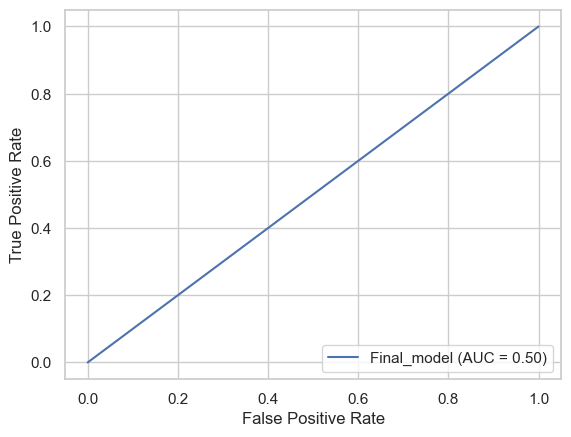

In [54]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")
roc_display.plot()


In [55]:
print(len(y_test))
print(len(pred))

294
294


Text(0, 0.5, 'Cumulative explained variance')

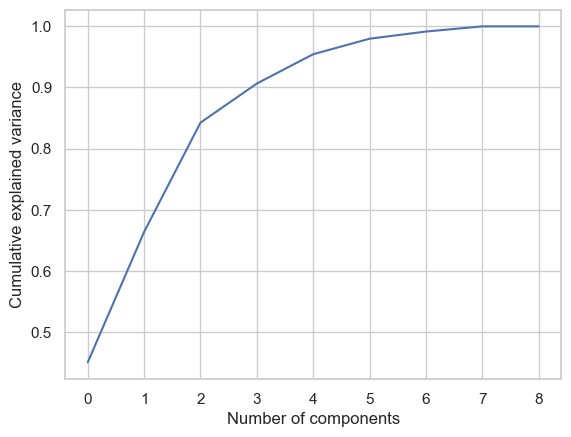

In [56]:
# apply PCA on X_train
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


In [57]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = pred
df["Original"] = a
df.head(10)

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0
